<a href="https://colab.research.google.com/github/kathrynle20/EnergyConsumptionDataAnalysis/blob/master/EnergyConsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data


In [ ]:
import pandas
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/My Drive/Energy.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.dtypes

Datetime    datetime64[ns]
AEP                  int64
DAYTON               int64
DOM                  int64
DUQ                  int64
NI                   int64
PJME                 int64
PJMW                 int64
Total                int64
dtype: object

In [ ]:
df1 = df.set_index("Datetime")
df1.head()

,AEP,DAYTON,DOM,DUQ,NI,PJME,PJMW,Total
Datetime,,,,,,,,
2006-01-01 01:00:00,14287,1697,9258,1255,10206,28884,4768,70355
2006-01-01 02:00:00,13932,1635,8987,1338,9808,27556,4613,67869
2006-01-01 03:00:00,13713,1584,8781,1276,9389,26484,4436,65663
2006-01-01 04:00:00,13656,1553,8680,1251,9034,25822,4362,64358
2006-01-01 05:00:00,13635,1555,8671,1228,8851,25530,4390,63860


In [ ]:
df1['Year'] = df1.index.year
df1['Month'] = df1.index.month
df1['Day'] = df1.index.day
df1['Weekday'] = df1.index.weekday
df1['Hour'] = df1.index.hour
df1

,AEP,DAYTON,DOM,DUQ,NI,PJME,PJMW,Total,Year,Month,Day,Weekday,Total_Difference,Hour
Datetime,,,,,,,,,,,,,,
2006-01-01 01:00:00,14287,1697,9258,1255,10206,28884,4768,70355,2006,1,1,6,NaN,1
2006-01-01 02:00:00,13932,1635,8987,1338,9808,27556,4613,67869,2006,1,1,6,-2486.0,2
2006-01-01 03:00:00,13713,1584,8781,1276,9389,26484,4436,65663,2006,1,1,6,-2206.0,3
2006-01-01 04:00:00,13656,1553,8680,1251,9034,25822,4362,64358,2006,1,1,6,-1305.0,4
2006-01-01 05:00:00,13635,1555,8671,1228,8851,25530,4390,63860,2006,1,1,6,-498.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-31 20:00:00,15127,1697,11820,1696,11585,35035,5655,82615,2010,12,31,4,-2074.0,20
2010-12-31 21:00:00,14807,1623,11532,1643,11243,33852,5488,80188,2010,12,31,4,-2427.0,21
2010-12-31 22:00:00,14450,1563,11180,1583,10825,32550,5305,77456,2010,12,31,4,-2732.0,22


In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)

from sklearn.model_selection import TimeSeriesSplit

from sklearn.model_selection import cross_val_score

# Data Analysis

In [ ]:
df 

,Datetime,AEP,DAYTON,DOM,DUQ,NI,PJME,PJMW,Total
0,2006-01-01 01:00:00,14287,1697,9258,1255,10206,28884,4768,70355
1,2006-01-01 02:00:00,13932,1635,8987,1338,9808,27556,4613,67869
2,2006-01-01 03:00:00,13713,1584,8781,1276,9389,26484,4436,65663
3,2006-01-01 04:00:00,13656,1553,8680,1251,9034,25822,4362,64358
4,2006-01-01 05:00:00,13635,1555,8671,1228,8851,25530,4390,63860
...,...,...,...,...,...,...,...,...,...
43808,2010-12-31 20:00:00,15127,1697,11820,1696,11585,35035,5655,82615
43809,2010-12-31 21:00:00,14807,1623,11532,1643,11243,33852,5488,80188
43810,2010-12-31 22:00:00,14450,1563,11180,1583,10825,32550,5305,77456
43811,2010-12-31 23:00:00,14089,1501,10809,1524,10511,31162,5113,74709


In [ ]:
print(df.Total.mean())
print(df.AEP.mean())
print(df.DAYTON.mean())
print(df.DOM.mean())
print(df.DUQ.mean()) # least energy consumption
print(df.NI.mean())
print(df.PJME.mean()) # most energy consumption
print(df.PJMW.mean())

80633.35064935064
16036.680848150092
2076.1683062104853
10842.360577910666
1670.5146645972657
11735.629995663388
32781.07205623901
5490.924200579737


# Graphs

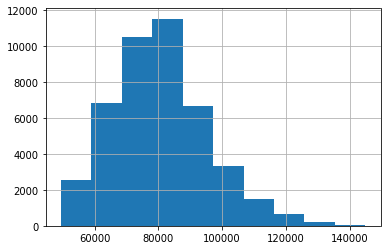

In [ ]:
df.Total.hist()

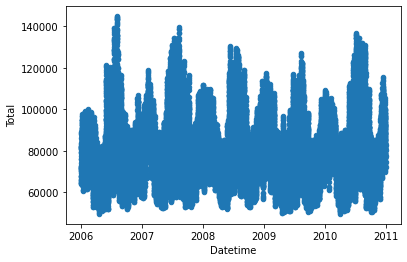

In [ ]:
df.plot(kind='scatter',y='Total',x='Datetime')

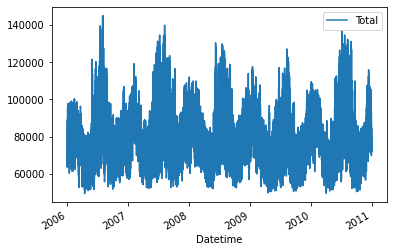

In [ ]:
df.plot.line(x='Datetime',y="Total")

In [ ]:
df2 = df1.loc[df1['Year'] == 2006]
df4 = df2.loc[df2['Month']==1]
df5 = df4.loc[df4['Day']==1]

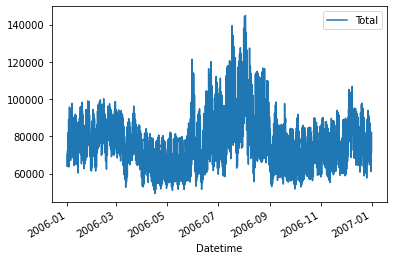

In [ ]:
df2.plot.line(y='Total')

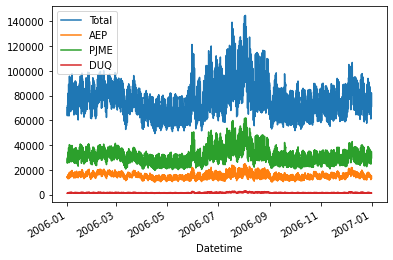

In [ ]:
df2.plot.line(y=['Total','AEP','PJME','DUQ'])

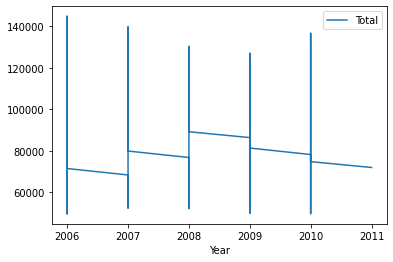

In [ ]:
df1.plot.line(x='Year',y="Total")

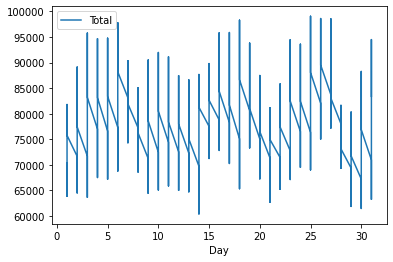

In [ ]:
df4.plot.line(x='Day',y="Total")

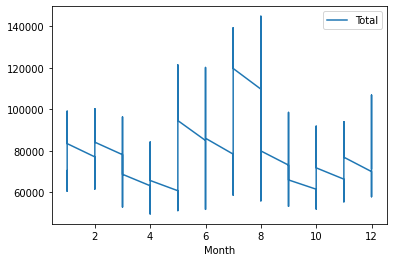

In [ ]:
df2.plot.line(x="Month",y="Total")

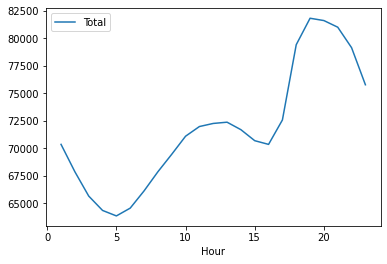

In [ ]:
df5.plot.line(x='Hour',y="Total")

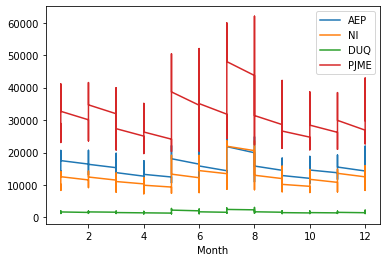

In [ ]:
from matplotlib import pyplot as plt
df2.plot.line(x='Month',y=['AEP','NI','DUQ','PJME'])

In [ ]:
df1['Total_Difference'] = df1['Total'] - df1['Total'].shift(1)
df1.head(24)

,AEP,DAYTON,DOM,DUQ,NI,PJME,PJMW,Total,Year,Month,Day,Weekday,Total_Difference
Datetime,,,,,,,,,,,,,
2006-01-01 01:00:00,14287,1697,9258,1255,10206,28884,4768,70355,2006,1,1,6,NaN
2006-01-01 02:00:00,13932,1635,8987,1338,9808,27556,4613,67869,2006,1,1,6,-2486.0
2006-01-01 03:00:00,13713,1584,8781,1276,9389,26484,4436,65663,2006,1,1,6,-2206.0
2006-01-01 04:00:00,13656,1553,8680,1251,9034,25822,4362,64358,2006,1,1,6,-1305.0
2006-01-01 05:00:00,13635,1555,8671,1228,8851,25530,4390,63860,2006,1,1,6,-498.0
2006-01-01 06:00:00,13850,1575,8900,1250,8801,25768,4424,64568,2006,1,1,6,708.0
2006-01-01 07:00:00,14199,1625,9276,1279,8858,26364,4529,66130,2006,1,1,6,1562.0
2006-01-01 08:00:00,14662,1675,9643,1313,9001,26865,4709,67868,2006,1,1,6,1738.0
2006-01-01 09:00:00,14952,1722,9941,1330,8996,27619,4894,69454,2006,1,1,6,1586.0


In [ ]:
df1['Previous_Total'] = df1['Total'].shift(1)
df1.head(24)

,AEP,DAYTON,DOM,DUQ,NI,PJME,PJMW,Total,Year,Month,Day,Weekday,Total_Difference,Previous_Total
Datetime,,,,,,,,,,,,,,
2006-01-01 01:00:00,14287,1697,9258,1255,10206,28884,4768,70355,2006,1,1,6,NaN,NaN
2006-01-01 02:00:00,13932,1635,8987,1338,9808,27556,4613,67869,2006,1,1,6,-2486.0,70355.0
2006-01-01 03:00:00,13713,1584,8781,1276,9389,26484,4436,65663,2006,1,1,6,-2206.0,67869.0
2006-01-01 04:00:00,13656,1553,8680,1251,9034,25822,4362,64358,2006,1,1,6,-1305.0,65663.0
2006-01-01 05:00:00,13635,1555,8671,1228,8851,25530,4390,63860,2006,1,1,6,-498.0,64358.0
2006-01-01 06:00:00,13850,1575,8900,1250,8801,25768,4424,64568,2006,1,1,6,708.0,63860.0
2006-01-01 07:00:00,14199,1625,9276,1279,8858,26364,4529,66130,2006,1,1,6,1562.0,64568.0
2006-01-01 08:00:00,14662,1675,9643,1313,9001,26865,4709,67868,2006,1,1,6,1738.0,66130.0
2006-01-01 09:00:00,14952,1722,9941,1330,8996,27619,4894,69454,2006,1,1,6,1586.0,67868.0


In [ ]:
df1.fillna(value=0,axis=1,inplace=True)

In [ ]:
df1

,AEP,DAYTON,DOM,DUQ,NI,PJME,PJMW,Total,Year,Month,Day,Weekday,Total_Difference,Previous_Total
Datetime,,,,,,,,,,,,,,
2006-01-01 01:00:00,14287,1697,9258,1255,10206,28884,4768,70355,2006,1,1,6,0.0,0.0
2006-01-01 02:00:00,13932,1635,8987,1338,9808,27556,4613,67869,2006,1,1,6,-2486.0,70355.0
2006-01-01 03:00:00,13713,1584,8781,1276,9389,26484,4436,65663,2006,1,1,6,-2206.0,67869.0
2006-01-01 04:00:00,13656,1553,8680,1251,9034,25822,4362,64358,2006,1,1,6,-1305.0,65663.0
2006-01-01 05:00:00,13635,1555,8671,1228,8851,25530,4390,63860,2006,1,1,6,-498.0,64358.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-31 20:00:00,15127,1697,11820,1696,11585,35035,5655,82615,2010,12,31,4,-2074.0,84689.0
2010-12-31 21:00:00,14807,1623,11532,1643,11243,33852,5488,80188,2010,12,31,4,-2427.0,82615.0
2010-12-31 22:00:00,14450,1563,11180,1583,10825,32550,5305,77456,2010,12,31,4,-2732.0,80188.0


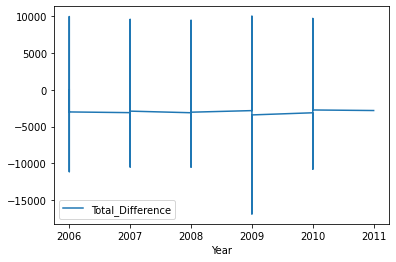

In [ ]:
df1.plot.line(x='Year',y='Total_Difference')

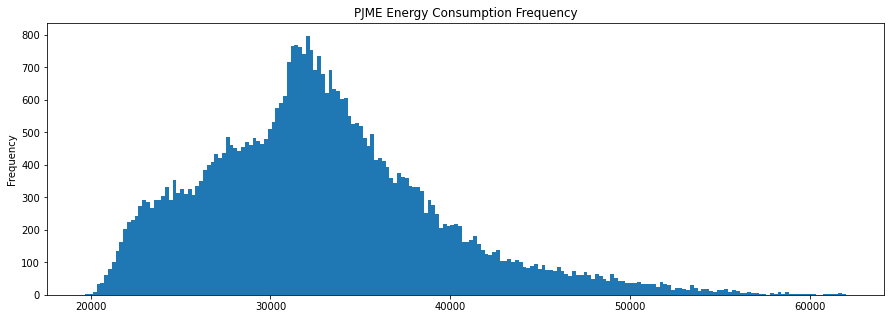

In [ ]:
df1['PJME'].plot.hist(figsize=(15, 5), bins=200, title='PJME Energy Consumption Frequency')

# Models

## Split training and testing data

In [ ]:
#X_train = df1.loc[df1['Year']<=2009]['Total_Difference']
#y_train = df1.loc[:'2009', 'Total']
#X_test = df1.loc[df1['Year']>2009]['Total_Difference']
#y_test = df1.loc['2010':, 'Total']
#X_train
X_train = df1[:'2009'].drop(['Total'], axis = 1)
y_train = pd.DataFrame(df1.loc[:'2009', 'Total'])
X_test = df1['2010':].drop(['Total'], axis = 1)
y_test = pd.DataFrame(df1.loc['2010':, 'Total'])
df1_holdout = df1['2010':]
print(y_test)
print(X_test)
print(X_train)
print(y_train)

                     Total
Datetime                  
2010-01-01 00:00:00  78140
2010-01-01 01:00:00  74739
2010-01-01 02:00:00  72306
2010-01-01 03:00:00  70463
2010-01-01 04:00:00  69479
...                    ...
2010-12-31 20:00:00  82615
2010-12-31 21:00:00  80188
2010-12-31 22:00:00  77456
2010-12-31 23:00:00  74709
2011-01-01 00:00:00  71887

[8758 rows x 1 columns]
                       AEP  DAYTON  ...  Total_Difference  Previous_Total
Datetime                            ...                                  
2010-01-01 00:00:00  15116    1794  ...           -3128.0         81268.0
2010-01-01 01:00:00  14585    1748  ...           -3401.0         78140.0
2010-01-01 02:00:00  14272    1728  ...           -2433.0         74739.0
2010-01-01 03:00:00  14065    1715  ...           -1843.0         72306.0
2010-01-01 04:00:00  14047    1723  ...            -984.0         70463.0
...                    ...     ...  ...               ...             ...
2010-12-31 20:00:00  15127    16

In [ ]:
#df1
#df3 = df1.drop(columns=['AEP',"DAYTON",'DOM','DUQ','NI','PJME','PJMW','Year','Month','Day','Weekday'],axis=1,inplace=True)
list = ['AEP',"DAYTON",'DOM','DUQ','NI','PJME','PJMW','Year','Month','Day','Weekday']
allcols = df1.columns.to_list()
df3 = df1[[x for x in allcols if x not in list]]

In [ ]:
df3

,Total,Total_Difference,Previous_Total
Datetime,,,
2006-01-01 01:00:00,70355,0.0,0.0
2006-01-01 02:00:00,67869,-2486.0,70355.0
2006-01-01 03:00:00,65663,-2206.0,67869.0
2006-01-01 04:00:00,64358,-1305.0,65663.0
2006-01-01 05:00:00,63860,-498.0,64358.0
...,...,...,...
2010-12-31 20:00:00,82615,-2074.0,84689.0
2010-12-31 21:00:00,80188,-2427.0,82615.0
2010-12-31 22:00:00,77456,-2732.0,80188.0


## Linear Regression

LR -4.460220389924355e-21 4.0521429572435876e-21


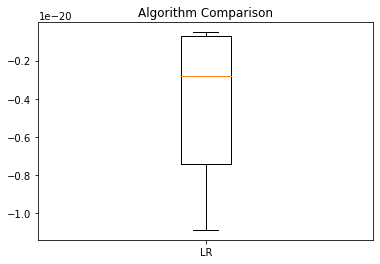

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=5)
    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print(name, cv_results.mean(), cv_results.std())

plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

## Random Forest Regressor

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

RF = RandomForestRegressor(max_depth = 30)
#cross_val = cross_val_score(RF, X_train, y_train, cv=tscv, scoring='f1_macro')
#np.mean(cross_val)
RF.fit(X_train, y_train)
df1_holdout['prediction'] = RF.predict(X_test)
mean_squared_error(y_test['Total'],df1_holdout['prediction'])
 
np.sqrt(mean_squared_error(y_test['Total'],df1_holdout['prediction']))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


483.1593067739899

In [ ]:
df1_holdout

,AEP,DAYTON,DOM,DUQ,NI,PJME,PJMW,Total,Year,Month,Day,Weekday,Total_Difference,Previous_Total,prediction
Datetime,,,,,,,,,,,,,,,
2010-01-01 00:00:00,15116,1794,10770,1526,11906,31647,5381,78140,2010,1,1,4,-3128.0,81268.0,77645.198358
2010-01-01 01:00:00,14585,1748,10273,1465,11450,30075,5143,74739,2010,1,1,4,-3401.0,78140.0,73934.074474
2010-01-01 02:00:00,14272,1728,9960,1397,11056,28907,4986,72306,2010,1,1,4,-2433.0,74739.0,71941.132840
2010-01-01 03:00:00,14065,1715,9797,1353,10735,27906,4892,70463,2010,1,1,4,-1843.0,72306.0,69865.361760
2010-01-01 04:00:00,14047,1723,9715,1336,10471,27373,4814,69479,2010,1,1,4,-984.0,70463.0,68738.786090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-31 20:00:00,15127,1697,11820,1696,11585,35035,5655,82615,2010,12,31,4,-2074.0,84689.0,82406.845673
2010-12-31 21:00:00,14807,1623,11532,1643,11243,33852,5488,80188,2010,12,31,4,-2427.0,82615.0,79818.590788
2010-12-31 22:00:00,14450,1563,11180,1583,10825,32550,5305,77456,2010,12,31,4,-2732.0,80188.0,77851.002083


In [ ]:
dfb = df1_holdout[['Total','prediction']]

In [ ]:
dfb['Compare'] = abs(dfb['Total'] - dfb['prediction'])
dfb

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Total,prediction,Compare
Datetime,,,
2010-01-01 00:00:00,78140,77761.137982,378.862018
2010-01-01 01:00:00,74739,73970.220475,768.779525
2010-01-01 02:00:00,72306,72225.693130,80.306870
2010-01-01 03:00:00,70463,69623.376109,839.623891
2010-01-01 04:00:00,69479,68852.089734,626.910266
...,...,...,...
2010-12-31 20:00:00,82615,82688.810934,73.810934
2010-12-31 21:00:00,80188,79546.239371,641.760629
2010-12-31 22:00:00,77456,77459.570952,3.570952


ModuleNotFoundError: ignored

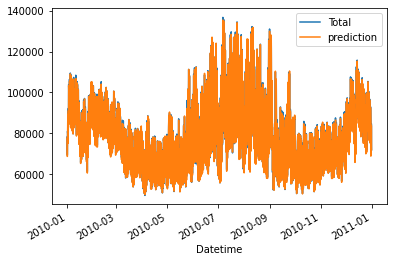

In [ ]:
df1_holdout.plot.line(y=['Total','prediction'])

## Linear Regression #2

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

LR = LinearRegression()
TSS = TimeSeriesSplit(n_splits = 3)

X = X_train[['Total_Difference', 'Previous_Total']]
y = y_train['Total']

LR.fit(X, y)

y_train['LR_prediction'] = LR.predict(X)

cv_results = cross_val_score(LR, X, y, cv=TSS, scoring='neg_mean_squared_error')
print((cv_results.mean()), cv_results.std())

-908.9424219295953 805.4179079751646


In [ ]:
y_train

,Total,LR_prediction
Datetime,,
2006-01-01 01:00:00,70355,65.366335
2006-01-01 02:00:00,67869,67879.910558
2006-01-01 03:00:00,65663,65675.759024
2006-01-01 04:00:00,64358,64372.142114
2006-01-01 05:00:00,63860,63874.852318
...,...,...
2009-12-31 19:00:00,93838,93829.372022
2009-12-31 20:00:00,90867,90859.598496
2009-12-31 21:00:00,87775,87769.987157
